# Pré-processamento

In [56]:
# Install packages
# Note: use Python 3.8 env
#!pip install --pre pycaret
#!pip install pycaret[analysis]
#!pip install boto3
#!pip install pycaret[mlops]

In [57]:
# Import packages
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from pycaret.classification import *
import pandas as pd

# download das stopwords para o idioma português
nltk.download('stopwords')
stop_words = stopwords.words('portuguese')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bruno\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [58]:
# Montagem de datasets
df_covid = pd.read_csv('data/exemplos-treinamento-covid.csv', delimiter=';')
df_seloturismo = pd.read_csv('data/exemplos-treinamento-seloturismo.csv', delimiter=';')
df_tuberculose = pd.read_csv('data/exemplos-treinamento-tuberculose.csv', delimiter=';')
df_all = pd.concat([df_covid, df_seloturismo, df_tuberculose], axis=0)

# Vetorização das palavras
cv = CountVectorizer(lowercase=True, stop_words=stop_words, strip_accents='unicode', token_pattern="[A-Za-z]+")
BoW = cv.fit_transform(df_all['input'])
BoW_df = pd.DataFrame(BoW.toarray(), columns=cv.get_feature_names())
BoW_df['target_cat'] = df_all.reset_index().category.map({'covid':0, 'seloturismo':1, 'tuberculose':2})

# Unseen data
df_test = pd.read_csv('data/dados-testes-experimentos.csv', delimiter=';')
df_test_blind = df_test.copy()
df_test_blind.drop('category', axis=1, inplace=True)

# Vetorização das palavras
cv = CountVectorizer(lowercase=True, stop_words=stop_words, strip_accents='unicode', token_pattern="[A-Za-z]+")
BoW_blind = cv.fit_transform(df_test_blind['input'])
BoW_df_blind = pd.DataFrame(BoW_blind.toarray(), columns=cv.get_feature_names())
#BoW_df['target_cat'] = df_all.reset_index().category.map({'covid':0, 'seloturismo':1, 'tuberculose':2})


# Inicialização

In [59]:
# Setup
# Iniciando os recursos da biblioteca, passando como alvo a coluna 'class' do dataset
setup = setup(data=BoW_df, target='target_cat', session_id=20221, train_size = 0.7, fold=10)

,Description,Value
0,Session id,20221
1,Target,target_cat
2,Target type,Multiclass
3,Original data shape,"(1043, 1048)"
4,Transformed data shape,"(1043, 875)"
5,Transformed train set shape,"(730, 875)"
6,Transformed test set shape,"(313, 875)"
7,Numeric features,1047
8,Preprocess,True
9,Imputation type,simple


# Treinamento

In [60]:
# compare models
top5 = compare_models(n_select = 5) 

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
svm,SVM - Linear Kernel,0.9781,0.0000,0.9781,0.9796,0.9779,0.9591,0.9603,0.0370
et,Extra Trees Classifier,0.9726,0.9983,0.9726,0.9742,0.9718,0.9483,0.9502,0.0890
dt,Decision Tree Classifier,0.9685,0.9612,0.9685,0.9702,0.9675,0.9407,0.9428,0.0530
ridge,Ridge Classifier,0.9658,0.0000,0.9658,0.9679,0.9647,0.9350,0.9376,0.0390
rf,Random Forest Classifier,0.9630,0.9962,0.9630,0.9652,0.9620,0.9301,0.9327,0.0940
lr,Logistic Regression,0.9603,0.9996,0.9603,0.9629,0.9591,0.9246,0.9277,0.3600
xgboost,Extreme Gradient Boosting,0.9603,0.9955,0.9603,0.9631,0.9596,0.9256,0.9281,0.7680
gbc,Gradient Boosting Classifier,0.9575,0.9934,0.9575,0.9604,0.9558,0.9194,0.9230,0.3730
knn,K Neighbors Classifier,0.9452,0.9808,0.9452,0.9492,0.9422,0.8950,0.9004,0.0530
nb,Naive Bayes,0.9425,0.9683,0.9425,0.9510,0.9432,0.8962,0.8994,0.0480


In [61]:
#predict_model(best)

# Otimização

In [62]:
# tune model
# tune models
tuned_top5 = [tune_model(i) for i in top5]
#best_tune = tune_model(best, choose_better = True)
#predict_model(best_tune)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9863,0.0000,0.9863,0.9866,0.9862,0.9745,0.9749
1,0.9726,0.0000,0.9726,0.9738,0.9715,0.9483,0.9500
2,0.9589,0.0000,0.9589,0.9651,0.9599,0.9256,0.9279
3,0.9726,0.0000,0.9726,0.9738,0.9724,0.9484,0.9497
4,0.9589,0.0000,0.9589,0.9615,0.9580,0.9217,0.9247
5,0.9589,0.0000,0.9589,0.9615,0.9584,0.9219,0.9248
6,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9863,0.0000,0.9863,0.9866,0.9862,0.9751,0.9755
8,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9589,0.9855,0.9589,0.9615,0.9580,0.9217,0.9247
1,0.9589,0.9893,0.9589,0.9615,0.9563,0.9216,0.9253
2,0.9452,0.9802,0.9452,0.9464,0.9440,0.8959,0.8986
3,0.9589,0.9864,0.9589,0.9615,0.9580,0.9217,0.9247
4,0.9315,0.9794,0.9315,0.9384,0.9270,0.8663,0.8751
5,0.9452,0.9890,0.9452,0.9497,0.9441,0.8946,0.8996
6,0.9315,0.9768,0.9315,0.9384,0.9243,0.8667,0.8769
7,0.8493,0.9899,0.8493,0.9214,0.8651,0.7535,0.7796
8,0.9452,0.9923,0.9452,0.9498,0.9409,0.8969,0.9032


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9589,0.9799,0.9589,0.9615,0.9580,0.9217,0.9247
1,0.9589,0.9521,0.9589,0.9615,0.9563,0.9216,0.9253
2,0.9589,0.9780,0.9589,0.9601,0.9583,0.9228,0.9243
3,0.9589,0.9508,0.9589,0.9615,0.9580,0.9217,0.9247
4,0.9452,0.9349,0.9452,0.9497,0.9429,0.8944,0.8998
5,0.9452,0.9341,0.9452,0.9497,0.9441,0.8946,0.8996
6,0.9726,0.9679,0.9726,0.9738,0.9717,0.9486,0.9502
7,0.9589,0.9527,0.9589,0.9615,0.9584,0.9238,0.9265
8,0.9726,0.9693,0.9726,0.9738,0.9717,0.9496,0.9512


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9863,0.0000,0.9863,0.9874,0.9864,0.9748,0.9752
1,0.9726,0.0000,0.9726,0.9734,0.9727,0.9500,0.9504
2,0.9178,0.0000,0.9178,0.9382,0.9221,0.8544,0.8603
3,0.9726,0.0000,0.9726,0.9768,0.9734,0.9507,0.9522
4,0.9589,0.0000,0.9589,0.9581,0.9582,0.9234,0.9238
5,0.9589,0.0000,0.9589,0.9677,0.9604,0.9255,0.9278
6,0.9589,0.0000,0.9589,0.9671,0.9605,0.9271,0.9303
7,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9726,0.0000,0.9726,0.9765,0.9733,0.9517,0.9532


Fitting 10 folds for each of 10 candidates, totalling 100 fits


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8082,0.9855,0.8082,0.9156,0.8303,0.6942,0.7370
1,0.9589,0.9893,0.9589,0.9615,0.9563,0.9216,0.9253
2,0.9452,0.9802,0.9452,0.9464,0.9440,0.8959,0.8986
3,0.9452,0.9821,0.9452,0.9497,0.9429,0.8944,0.8998
4,0.9315,0.9758,0.9315,0.9384,0.9270,0.8663,0.8751
5,0.9315,0.9860,0.9315,0.9384,0.9292,0.8666,0.8745
6,0.9315,0.9661,0.9315,0.9384,0.9243,0.8667,0.8769
7,0.8493,0.9899,0.8493,0.9214,0.8651,0.7535,0.7796
8,0.9452,0.9847,0.9452,0.9498,0.9409,0.8969,0.9032


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [63]:
# ensemble model
# ensemble models
bagged_top5 = [ensemble_model(i) for i in tuned_top5]
#best_ens = ensemble_model(best, choose_better = True)
#predict_model(best_ens)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9863,0.9821,0.9863,0.9866,0.9862,0.9745,0.9749
1,0.9726,0.9643,0.9726,0.9738,0.9715,0.9483,0.9500
2,0.9726,0.9924,0.9726,0.9740,0.9721,0.9492,0.9502
3,0.9726,0.9814,0.9726,0.9738,0.9724,0.9484,0.9497
4,0.9452,0.9820,0.9452,0.9497,0.9429,0.8944,0.8998
5,0.9589,0.9850,0.9589,0.9601,0.9583,0.9228,0.9243
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9726,1.0000,0.9726,0.9738,0.9721,0.9498,0.9513
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9589,0.9949,0.9589,0.9615,0.9580,0.9217,0.9247
1,0.9726,0.9942,0.9726,0.9738,0.9715,0.9483,0.9500
2,0.9589,0.9993,0.9589,0.9601,0.9583,0.9228,0.9243
3,0.9589,1.0000,0.9589,0.9615,0.9580,0.9217,0.9247
4,0.9452,0.9976,0.9452,0.9497,0.9429,0.8944,0.8998
5,0.9452,0.9996,0.9452,0.9497,0.9441,0.8946,0.8996
6,0.9726,1.0000,0.9726,0.9738,0.9717,0.9486,0.9502
7,0.9863,0.9998,0.9863,0.9866,0.9862,0.9751,0.9755
8,0.9863,1.0000,0.9863,0.9866,0.9861,0.9751,0.9755


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9589,0.9820,0.9589,0.9615,0.9580,0.9217,0.9247
1,0.9589,0.9643,0.9589,0.9615,0.9563,0.9216,0.9253
2,0.9589,0.9745,0.9589,0.9601,0.9583,0.9228,0.9243
3,0.9589,0.9635,0.9589,0.9615,0.9580,0.9217,0.9247
4,0.9452,0.9643,0.9452,0.9497,0.9429,0.8944,0.8998
5,0.9452,0.9739,0.9452,0.9497,0.9441,0.8946,0.8996
6,0.9726,0.9811,0.9726,0.9738,0.9717,0.9486,0.9502
7,0.9726,0.9759,0.9726,0.9738,0.9721,0.9498,0.9513
8,0.9863,1.0000,0.9863,0.9866,0.9861,0.9751,0.9755


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9863,0.9917,0.9863,0.9874,0.9864,0.9748,0.9752
1,0.9726,0.9914,0.9726,0.9734,0.9727,0.9500,0.9504
2,0.9178,0.9480,0.9178,0.9382,0.9221,0.8544,0.8603
3,0.9589,0.9822,0.9589,0.9609,0.9596,0.9252,0.9256
4,0.9315,0.9720,0.9315,0.9305,0.9303,0.8711,0.8723
5,0.9589,0.9892,0.9589,0.9677,0.9604,0.9255,0.9278
6,0.9589,0.9820,0.9589,0.9636,0.9595,0.9270,0.9295
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9726,0.9917,0.9726,0.9765,0.9733,0.9517,0.9532


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9589,0.9946,0.9589,0.9615,0.9580,0.9217,0.9247
1,0.9726,0.9937,0.9726,0.9738,0.9715,0.9483,0.9500
2,0.9589,0.9988,0.9589,0.9601,0.9583,0.9228,0.9243
3,0.9589,0.9998,0.9589,0.9615,0.9580,0.9217,0.9247
4,0.9178,0.9966,0.9178,0.9275,0.9101,0.8375,0.8504
5,0.9315,0.9990,0.9315,0.9384,0.9292,0.8666,0.8745
6,0.9315,1.0000,0.9315,0.9384,0.9243,0.8667,0.8769
7,0.9863,0.9998,0.9863,0.9866,0.9862,0.9751,0.9755
8,0.9726,1.0000,0.9726,0.9738,0.9717,0.9496,0.9512


In [64]:
# blend models
blender = blend_models(estimator_list = top5) 

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9726,0.0000,0.9726,0.9738,0.9724,0.9484,0.9497
1,0.9726,0.0000,0.9726,0.9738,0.9715,0.9483,0.9500
2,0.9589,0.0000,0.9589,0.9601,0.9583,0.9228,0.9243
3,0.9589,0.0000,0.9589,0.9615,0.9580,0.9217,0.9247
4,0.9452,0.0000,0.9452,0.9497,0.9429,0.8944,0.8998
5,0.9589,0.0000,0.9589,0.9615,0.9584,0.9219,0.9248
6,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9726,0.0000,0.9726,0.9738,0.9721,0.9498,0.9513
8,0.9863,0.0000,0.9863,0.9866,0.9861,0.9751,0.9755


In [65]:
# stack models
stacker = stack_models(estimator_list = top5) 

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9863,0.9990,0.9863,0.9866,0.9862,0.9745,0.9749
1,0.9726,0.9991,0.9726,0.9737,0.9715,0.9488,0.9500
2,0.9726,0.9993,0.9726,0.9737,0.9728,0.9501,0.9505
3,0.9863,1.0000,0.9863,0.9866,0.9862,0.9745,0.9749
4,0.9726,0.9957,0.9726,0.9738,0.9724,0.9484,0.9497
5,0.9726,0.9973,0.9726,0.9740,0.9721,0.9492,0.9502
6,0.9863,1.0000,0.9863,0.9874,0.9865,0.9751,0.9755
7,0.9863,1.0000,0.9863,0.9866,0.9862,0.9751,0.9755
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [66]:
# automl 
best = automl(optimize = 'Recall')
print(best)

StackingClassifier(cv=5,
                   estimators=[('SVM - Linear Kernel',
                                SGDClassifier(alpha=0.0001, average=False,
                                              class_weight=None,
                                              early_stopping=False, epsilon=0.1,
                                              eta0=0.001, fit_intercept=True,
                                              l1_ratio=0.15,
                                              learning_rate='optimal',
                                              loss='hinge', max_iter=1000,
                                              n_iter_no_change=5, n_jobs=-1,
                                              penalty='l2', power_t=0.5,
                                              random_state=20221, shuffle=True,
                                              tol=0.001,
                                              validation_...
                                                       random_stat

In [67]:
# calibrate model
best_calib = calibrate_model(best)
predict_model(best_calib)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9726,0.9971,0.9726,0.9738,0.9724,0.9484,0.9497
1,0.9726,0.9975,0.9726,0.9738,0.9715,0.9483,0.9500
2,0.9726,1.0000,0.9726,0.9768,0.9729,0.9498,0.9511
3,0.9726,0.9976,0.9726,0.9738,0.9724,0.9484,0.9497
4,0.9452,0.9966,0.9452,0.9497,0.9429,0.8944,0.8998
5,0.9589,0.9976,0.9589,0.9615,0.9584,0.9219,0.9248
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9726,1.0000,0.9726,0.9738,0.9721,0.9498,0.9513
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Stacking Classifier,0.9840,1.0000,0.9840,0.9844,0.9837,0.9704,0.9709


,abracar,abraco,acesso,acho,acionar,acompanhamento,acontece,acontecera,acordo,acrescimo,...,visitar,visivel,vistoria,vistorias,vivo,voltar,vou,target_cat,Label,Score
730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9122
731,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9408
732,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9083
733,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2,0.9232
734,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.9948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1038,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.9060
1039,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.8953
1040,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.9446
1041,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.9371


# Análise

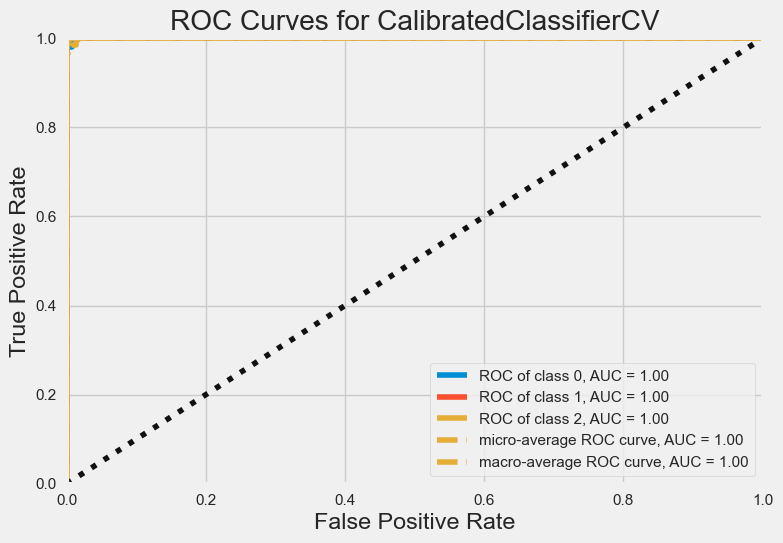

In [68]:
# plot model
plot_model(best_calib, plot = 'auc')

In [69]:
# launch evaluate widget
evaluate_model(best_calib)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [70]:
# interpret model
#interpret_model(best_calib)

In [71]:
# launch dashboard
#dashboard(best_calib)

In [72]:
# deep check model
#deep_check(best_calib)

In [73]:
# launch eda
eda(display_format = 'bokeh')

Shape of your Data Set loaded: (1043, 875)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...


,Nuniques,dtype,Nulls,Nullpercent,NuniquePercent,Value counts Min,Data cleaning improvement suggestions
protocolos,3,float64,0,0.000000,0.287632,0,skewed column: cap or drop possible outliers
quanto,3,float64,0,0.000000,0.287632,0,highly skewed column: remove outliers or do box-cox transform
turista,3,float64,0,0.000000,0.287632,0,skewed column: cap or drop possible outliers
pessoa,3,float64,0,0.000000,0.287632,0,highly skewed column: remove outliers or do box-cox transform
nao,3,float64,0,0.000000,0.287632,0,skewed column: cap or drop possible outliers
selo,3,float64,0,0.000000,0.287632,0,
ter,3,float64,0,0.000000,0.287632,0,highly skewed column: remove outliers or do box-cox transform
tuberculose,3,float64,0,0.000000,0.287632,0,skewed column: cap or drop possible outliers
ouvidoria,2,float64,0,0.000000,0.191755,0,highly skewed column: remove outliers or do box-cox transform
passarao,2,float64,0,0.000000,0.191755,0,highly skewed column: remove outliers or do box-cox transform


    874 Predictors classified...
        No variables removed since no ID or low-information variables found in data set

################ Multi_Classification problem #####################
Number of variables = 874 exceeds limit, finding top 30 variables through XGBoost
    No categorical feature reduction done. All 866 Categorical vars selected 
    Removing correlated variables from 8 numerics using SULO method
Selecting all (8) variables since none of them are highly correlated...
    Adding 866 categorical variables to reduced numeric variables  of 8
############## F E A T U R E   S E L E C T I O N  ####################
Current number of predictors = 874 
    Finding Important Features using Boosted Trees algorithm...
        using 874 variables...
        using 699 variables...
        using 524 variables...
        using 349 variables...
        using 174 variables...
Found 88 important features
    Since number of features selected is greater than max columns analyzed, limiting

,Nuniques,dtype,Nulls,Nullpercent,NuniquePercent,Value counts Min,Data cleaning improvement suggestions
tuberculose,3,float64,0,0.000000,0.287632,0,skewed column: cap or drop possible outliers
selo,3,float64,0,0.000000,0.287632,0,
responsavel,2,float64,0,0.000000,0.191755,0,skewed column: cap or drop possible outliers
manter,2,float64,0,0.000000,0.191755,0,highly skewed column: remove outliers or do box-cox transform
laboratorios,2,float64,0,0.000000,0.191755,0,highly skewed column: remove outliers or do box-cox transform
grave,2,float64,0,0.000000,0.191755,0,highly skewed column: remove outliers or do box-cox transform
china,2,float64,0,0.000000,0.191755,0,highly skewed column: remove outliers or do box-cox transform
posso,2,float64,0,0.000000,0.191755,0,skewed column: cap or drop possible outliers
gel,2,float64,0,0.000000,0.191755,0,highly skewed column: remove outliers or do box-cox transform
alcool,2,float64,0,0.000000,0.191755,0,highly skewed column: remove outliers or do box-cox transform


    30 Predictors classified...
    No variables removed since no ID or low-information variables found in data
    List of variables removed: []
   Total columns > 30, too numerous to print.


Row
    [0] WidgetBox
        [0] Select(name='y', options=['tuberculose', 'selo'], value='tuberculose')
    [1] ParamFunction(function)

Row
    [0] WidgetBox
        [0] Select(name='X-Axis', options=['tuberculose', 'selo'], value='tuberculose')
        [1] Select(name='Y-Axis', options=['tuberculose', 'selo'], value='selo')
        [2] Select(name='Color', options=['None', 'target_cat'], value='None')
    [1] ParamFunction(function)

Column
    [0] Row
        [0] HoloViews(DynamicMap)
        [1] Column
            [0] WidgetBox
                [0] Select(margin=(20, 20, 20, 20), options=['covid', 'miliar', ...], value='covid', width=250)
            [1] VSpacer()

Column
    [0] Row
        [0] HoloViews(DynamicMap)
        [1] Column
            [0] WidgetBox
                [0] Select(margin=(20, 20, 20, 20), options=['selo', 'tuberculose'], value='selo', width=250)
            [1] VSpacer()

HoloViews(DynamicMap)

HoloViews(Layout)

No date vars could be found in data set


HoloViews(Overlay)

Row
    [0] WidgetBox
        [0] Select(name='X-Axis', options=['covid', 'miliar', ...], value='covid')
        [1] Select(name='Y-Axis', options=['tuberculose', 'selo'], value='tuberculose')
    [1] ParamFunction(function)

Time to run AutoViz (in seconds) = 10


In [74]:
# check leaderboard
get_leaderboard()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,13:04:22
Status,. . . . . . . . . . . . . . . . . .,Creating dataframe
Estimator,. . . . . . . . . . . . . . . . . .,Stacking Classifier


Model Name  \
Index                                    
0                  Logistic Regression   
1               K Neighbors Classifier   
2                          Naive Bayes   
3             Decision Tree Classifier   
4                  SVM - Linear Kernel   
5                     Ridge Classifier   
6             Random Forest Classifier   
7      Quadratic Discriminant Analysis   
8                 Ada Boost Classifier   
9         Gradient Boosting Classifier   
10        Linear Discriminant Analysis   
11              Extra Trees Classifier   
12           Extreme Gradient Boosting   
13     Light Gradient Boosting Machine   
14                    Dummy Classifier   
15                 SVM - Linear Kernel   
16                 SVM - Linear Kernel   
17              Extra Trees Classifier   
18              Extra Trees Classifier   
19            Decision Tree Classifier   
20            Decision Tree Classifier   
21                    Ridge Classifier   
22                    Ridge Classifier   
23            Random Forest Classifier   
24            Random Forest Classifier   
25                 SVM - Linear Kernel   
26              Extra Trees Classifier   
27            Decision Tree Classifier   
28                    Ridge Classifier   
29            Random Forest Classifier   
30                   Voting Classifier   
31                 Stacking Classifier   
32                 Stacking Classifier   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

# Deploy

In [75]:
BoW_df_blind

,abrace,acessibilidade,acompanhados,acontece,adequada,adesao,adoecem,adoecimento,adotado,adotar,...,vigilancia,virus,visita,vistoriar,vivem,vivendo,voltar,vou,vulneraveis,vulneravel
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
153,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
154,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
# Unseen data predictions
#predict_model(best_calib, raw_score = True, data = BoW_df_blind, drift_report = True)
#best_calib.predict(BoW_df_blind)

In [77]:
# finalize a model
final = finalize_model(best_calib)

In [78]:
# deploy a model
deploy_model(final, model_name = 'bow_multi_aws', platform = 'aws', authentication = { 'bucket'  : 'md-chatbot' })

Model Successfully Deployed on AWS S3


In [79]:

# Salvando o modelo
save_model(final, 'models/bow_multi')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=C:\Users\bruno\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['abdomen', 'abracar', 'abraco',
                                              'acesso', 'acho', 'acionar',
                                              'acometer', 'acometidos',
                                              'acompanhamento', 'acontece',
                                              'acontecera', 'acordo', 'acougue',
                                              'acrescido', 'acrescimo',
                                              'acrescimos', 'aderi', 'aderir',
                                              'aderiram', 'ad...
                                                                           final_estimator=LogisticRegression(C=1.0,
                                                                                                              class_wei

In [81]:
# save config
save_config('config/bow_multi_config')

In [82]:
# create api
create_api(best_calib, 'api/bow_multi_api')


    API sucessfully created. This function only creates a POST API, it doesn't run it automatically.
    To run your API, please run this command --> !python api/bow_multi_api.py
        


In [83]:
# create app
create_app(best_calib)

Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.


(<gradio.routes.App at 0x26c730031f0>, 'http://127.0.0.1:7861/', None)